# <center>CMSC 320 Final Tutorial: Data Science using Yelp.</center>

### <center>By: Oren Nureil, Michael Chacham-Tzedek, and Yuval Reiss</center>




<img src="yelp2.png">
<center>Credit: Yelp https://www.yelp.com</center>

## The Data Lifecycle

The Data lifecycle, that has organized our CMSC 320 course throughout this semester, provides a high level overview of the stages involved in successful management and preservation of data for use and reuse. Our final project will deal with the process of applying the Data Life cycle to a real life dataset of Yelp reviews, users, and businesses. Buckle up, cause it's going to be a bumpy ride!! Hope you enjoy it!!

<img src="one.png">

## Data Collection

__So where do we begin? What happens now? How do I do Part 2 for Project 3? I'm scared!__

Well lets take a deep breath, all we have to do is review the steps of the data lifecycle. The first step is data collection, collecting data? Sounds easy enough but from where, and how? 

<img src="clueless.png">


Well we know that we want to work with Yelp, so no better place than to look for it on Yelp's site!!

<img src="two.png">

We import all of our different libraries and packages that we will use to process, explore, and test the data, we added to this list as the project went on.

In [62]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
%matplotlib inline
import nltk
from nltk.corpus import stopwords
import pandas as pd
import math
import os
import warnings
import numpy as np
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split

In [2]:
REVIEW_FOLDER = os.path.join('dataset', 'review.json')
BUSINESS_FOLDER = os.path.join('dataset', 'business.json')
USER_FOLDER = os.path.join('dataset', 'user.json')

In [3]:
user_data = pd.read_json(USER_FOLDER, lines=True)
review_datas = pd.read_json(REVIEW_FOLDER, lines=True, chunksize = 10000000)
business_data = pd.read_json(BUSINESS_FOLDER, lines=True)


Need a workaround to extract the data from this JsonReader object since, just like our egos, the data is way too big. The chunksize parameter indicates the number of review objects that we obtain from the data source.

In [4]:
for review_data in review_datas:
    break
review_data

,business_id,cool,date,funny,review_id,stars,text,useful,user_id
0,uYHaNptLzDLoV_JZ_MuzUA,0,2016-07-12,0,VfBHSwC5Vz_pbFluy07i9Q,5,My girlfriend and I stayed here for 3 nights a...,0,cjpdDjZyprfyDG3RlkVG3w
1,uYHaNptLzDLoV_JZ_MuzUA,0,2016-10-02,0,3zRpneRKDsOPq92tq7ybAA,3,If you need an inexpensive place to stay for a...,0,bjTcT8Ty4cJZhEOEo01FGA
2,uYHaNptLzDLoV_JZ_MuzUA,0,2015-09-17,0,ne5WhI1jUFOcRn-b-gAzHA,3,Mittlerweile gibt es in Edinburgh zwei Ableger...,0,AXgRULmWcME7J6Ix3I--ww
3,uYHaNptLzDLoV_JZ_MuzUA,0,2016-08-21,0,llmdwOgDReucVoWEry61Lw,4,Location is everything and this hotel has it! ...,0,oU2SSOmsp_A8JYI7Z2JJ5w
4,uYHaNptLzDLoV_JZ_MuzUA,0,2013-11-20,0,DuffS87NaSMDmIfluvT83g,5,gute lage im stadtzentrum. shoppingmeile und s...,0,0xtbPEna2Kei11vsU-U2Mw
5,uYHaNptLzDLoV_JZ_MuzUA,0,2016-06-05,0,GvLmUkjUrOyFH8KFnmT1uw,5,Erstklassige Lage. Dazu ist alles geschrieben ...,0,rW8q706dz5-NnXDzMwVkiw
6,uYHaNptLzDLoV_JZ_MuzUA,0,2015-02-21,0,lGEl24NGj2HVBJrodeXcjg,4,"Beautiful space, great location, staff rock. T...",0,yx8vNXUL0D0HS8rUIC7AFA
7,uYHaNptLzDLoV_JZ_MuzUA,0,2013-07-07,0,cUgvEy5wj7zYE68v1BzzVg,4,This is a fairly new property I think. It is a...,0,zXnH6W74FAJQ7q7b-NuBsA
8,uYHaNptLzDLoV_JZ_MuzUA,2,2013-04-27,0,FSB_BnvysBgH3JYrbFNcgw,4,First time at this group of hotels. Pretty new...,2,c5yp5hxwC1N98MjbV2LyWQ
9,uYHaNptLzDLoV_JZ_MuzUA,0,2015-04-13,0,dhl3ZW9aAEX_T7_um5tfaQ,4,Location location location! \n\nMotel One is j...,2,xJisL5w4wOgiYLokGMT_IA


And viola! A pandas dataframe. Well that wasn't too hard, I think I like data science!

## Data Processing

Now comes the data processing part, in this stage of the data lifecycle we clean up and tidy the data so that we can begin to analyse it later on! It's during this stage that you also want to look out for anomalys or things that interest you in the data, like for instance, money spent by baseball franchise during the Oakland A's Moneyball period, or investigate if there exists a correlation between solar flares and Halos observed?

<img src="three.png">

After looking at the Yelp dataset, one thing really caught our eyes. While Yelp is primarily a crowd-sourced review platform about local businesses, we were very suprised to discover that within the user dataset exists a column called "Fans". We were not familiar with Yelp as some social networking platform, so we attempted to uncover the truth behind Yelp's "Fans" functionaliy and figure out why someone would have many fans, or what would make someone want to be someone else's fan? 



Since our dataset is very large so we will remove any data not pertaining to our hypothesis. We choose to focus at users with more than 10 fans, any number less than that is just simply insignificant, in this way we can process the data to suit our exploratory needs.

In [5]:
user_col_to_remove = [col for col in user_data.columns if (col != 'fans' and col != 'user_id')]
user_df = user_data.drop(columns=user_col_to_remove)
user_df = user_df[user_df['fans'] > 10]
user_df.head()

,fans,user_id
0,209,lsSiIjAKVl-QRxKjRErBeg
1,835,om5ZiponkpRqUNa3pVPiRg
2,17,-lGwMGHMC_XihFJNKCJNRg
3,11,D-ydMTPGWXTVm4_jjp0k9g
4,49,PcvbBOCOcs6_suRDH7TSTg


For each User, Review, and Business dataframe we remove any columns not associated with our hypothesis, or in this case anything not having to do with number of fans or rating.

In [6]:
review_col_to_remove = [col for col in review_data.columns if (col != 'business_id' and col != 'stars' and col !='user_id')]
review_df = review_data.drop(columns=review_col_to_remove)
review_df.head()

,business_id,stars,user_id
0,uYHaNptLzDLoV_JZ_MuzUA,5,cjpdDjZyprfyDG3RlkVG3w
1,uYHaNptLzDLoV_JZ_MuzUA,3,bjTcT8Ty4cJZhEOEo01FGA
2,uYHaNptLzDLoV_JZ_MuzUA,3,AXgRULmWcME7J6Ix3I--ww
3,uYHaNptLzDLoV_JZ_MuzUA,4,oU2SSOmsp_A8JYI7Z2JJ5w
4,uYHaNptLzDLoV_JZ_MuzUA,5,0xtbPEna2Kei11vsU-U2Mw


In [7]:
business_col_to_remove = [col for col in business_data.columns if (col != 'business_id' and col != 'stars')]
business_df = business_data.drop(columns=business_col_to_remove)
business_df.head()

,business_id,stars
0,YDf95gJZaq05wvo7hTQbbQ,2.0
1,mLwM-h2YhXl2NCgdS84_Bw,4.5
2,v2WhjAB3PIBA8J8VxG3wEg,4.5
3,CVtCbSB1zUcUWg-9TNGTuQ,3.0
4,duHFBe87uNSXImQmvBh87Q,4.5


In [8]:
df_merge = user_df.merge(review_df, how='inner', left_on='user_id', right_on='user_id')

We merge the users and reviews dataframe so we can cross reference all user reviews with each users average rating and number of fans.

In [9]:
business_df.rename(columns={'stars': 'business_stars'}, inplace=True)

In [10]:
merge_all = df_merge.merge(business_df, how='inner', left_on='business_id', right_on='business_id')

Now we merge the business dataframe to the other two in order to cross reference the different reviews from each user pertaining to each business. 

In [11]:
merge_all.head()

,fans,user_id,business_id,stars,business_stars
0,209,lsSiIjAKVl-QRxKjRErBeg,J4CATH00YZrq8Bne2S4_cw,3,4.0
1,17,N2arP_u4sMGLgOZhA6ZFoQ,J4CATH00YZrq8Bne2S4_cw,5,4.0
2,13,tjufYqU4PWkP2j6vAFsCFw,J4CATH00YZrq8Bne2S4_cw,5,4.0
3,22,XHHUypDIxHvykpqd7pjydw,J4CATH00YZrq8Bne2S4_cw,4,4.0
4,13,zMLbjqeTqp83g0uIAk0SWg,J4CATH00YZrq8Bne2S4_cw,5,4.0


## Exploratory Data Analysis and Vizualization

Now this is where the fun really starts! We collected the data, we cleaned the data, we processed the data, now its time to start probing the data and figuring out what we can learn from this data! 

<img src="four.png">

After all the processing in the previous step, we formulated a loose hypothesis. We now argue that if one user's personal rating of a business is close to the actual rating of the business this would be a good reason to be this users fan, for the same reason that people follow youtube personalities and popular reviewers. So we are expecting to see a positive correlation between how close the user's rating is to the actual rating of the business and to the number of fans that that user has.

In [12]:
max_fans = np.max(merge_all['fans'])
bins = np.linspace(0, max_fans, num=10)
bins = [0, 200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000, max_fans]
merge_all['fans_class'] = pd.cut(merge_all['fans'], bins=bins, include_lowest=True, right=True)

In order to better understand the amount of fans our users have, we divide the users into bins based on their amount of fans.

In [13]:
merge_all.groupby('fans_class').size()

fans_class
(-0.001, 200.0]     713684
(200.0, 400.0]       24367
(400.0, 600.0]       14085
(600.0, 800.0]        3990
(800.0, 1000.0]        845
(1000.0, 1200.0]       173
(1200.0, 1400.0]       313
(1400.0, 1600.0]       126
(1600.0, 1800.0]       127
(1800.0, 2000.0]        76
(2000.0, 6087.0]        32
dtype: int64

Now that we see the actual distribution of fans among users, we can obtain the difference between each users personal rating and the business's rating.

In [14]:
merge_all['user_vs_bus'] = (merge_all['stars']-merge_all['business_stars']).apply(lambda x : math.fabs(x))

In [15]:
merge_all.head()

,fans,user_id,business_id,stars,business_stars,fans_class,user_vs_bus
0,209,lsSiIjAKVl-QRxKjRErBeg,J4CATH00YZrq8Bne2S4_cw,3,4.0,"(200.0, 400.0]",1.0
1,17,N2arP_u4sMGLgOZhA6ZFoQ,J4CATH00YZrq8Bne2S4_cw,5,4.0,"(-0.001, 200.0]",1.0
2,13,tjufYqU4PWkP2j6vAFsCFw,J4CATH00YZrq8Bne2S4_cw,5,4.0,"(-0.001, 200.0]",1.0
3,22,XHHUypDIxHvykpqd7pjydw,J4CATH00YZrq8Bne2S4_cw,4,4.0,"(-0.001, 200.0]",0.0
4,13,zMLbjqeTqp83g0uIAk0SWg,J4CATH00YZrq8Bne2S4_cw,5,4.0,"(-0.001, 200.0]",1.0


Now we group the users according to the number of fans they have and acquire the average of the differences between the users versus the business's review.

In [16]:
dt_bus_vs_user = merge_all.groupby('fans_class')['user_vs_bus'].mean()

In [17]:
dt_bus_vs_user

fans_class
(-0.001, 200.0]     0.762726
(200.0, 400.0]      0.678910
(400.0, 600.0]      0.657047
(600.0, 800.0]      0.662657
(800.0, 1000.0]     0.640237
(1000.0, 1200.0]    0.569364
(1200.0, 1400.0]    0.680511
(1400.0, 1600.0]    0.646825
(1600.0, 1800.0]    0.751969
(1800.0, 2000.0]    0.802632
(2000.0, 6087.0]    0.671875
Name: user_vs_bus, dtype: float64

Now for the visual part of Data Visualization:

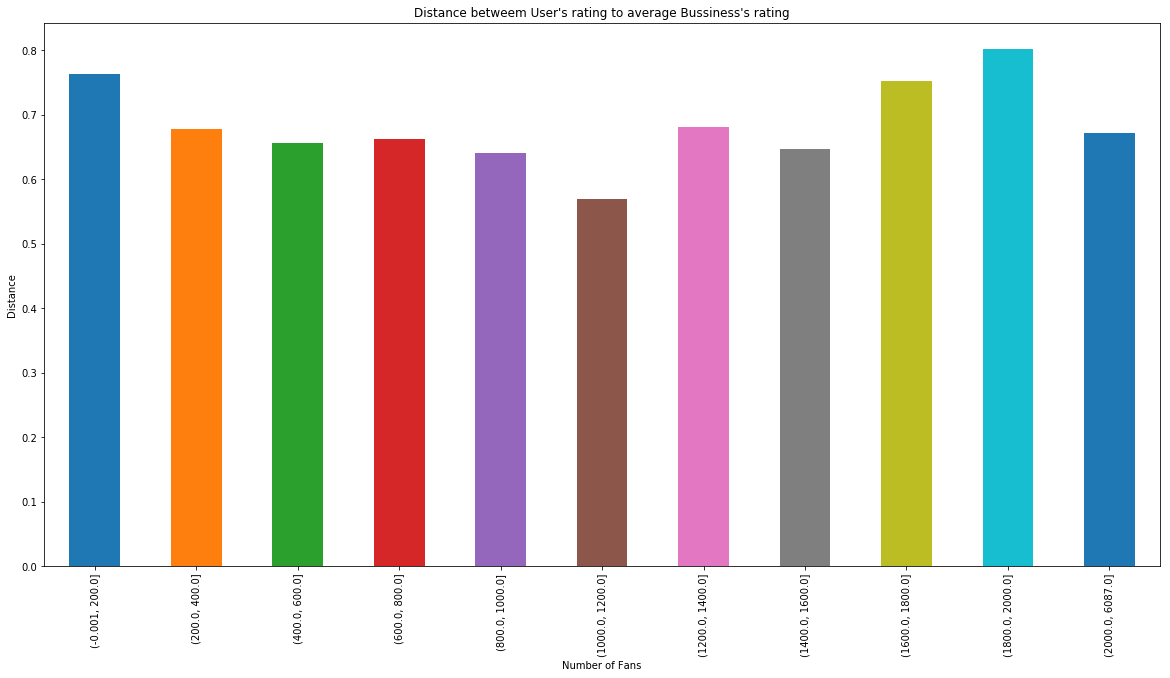

In [54]:
dt_bus_vs_user.plot.bar()
plt.gcf().set_size_inches(20, 10, forward=True)
plt.xlabel('Number of Fans')
plt.ylabel('Distance')
plt.title('Distance betweem User\'s rating to average Bussiness\'s rating')
plt.show()

Taking a closer look at the bar plot above, we notice something interesting. Our hypothesis tried to prove that as the number of fans increases, the users rating is closer to the business's actual rating, but we can see that starting with users that have number of fans somewhere between 1000-1200, the error actually grows. So we can conclude that the number of fans is not necessarily driven by how close the users rating is compare to the actual rating.

So what other user attributes lead someone to have alot of fans? Well then lets keep the good times going and figure it out, but before we do that lets split our data up into bins based on the number of fans they have, that way it will be easier to visualize the our results.  

In [19]:
#Adding the fans_class to the main user dataframe
max_fans = np.max(user_data['fans'])
bins = np.linspace(0, max_fans, num=10)
bins = [0, 200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000, max_fans]
user_data['fans_class'] = pd.cut(user_data['fans'], bins=bins, include_lowest=True, right=True)

Before we delve in further, lets check the correlations between our different attributes.

In [20]:
dt = user_data.groupby('fans_class')[['fans', 'funny', 'review_count', 'useful', 'cool']].mean()
dt.corr()

,fans,funny,review_count,useful,cool
fans,1.000000,0.153339,0.435410,0.493583,0.525660
funny,0.153339,1.000000,0.448898,0.673192,0.780342
review_count,0.435410,0.448898,1.000000,0.537248,0.539936
useful,0.493583,0.673192,0.537248,1.000000,0.962144
cool,0.525660,0.780342,0.539936,0.962144,1.000000


So lets take a look at the funny attribute, would reviews that are rated as funny be necesarily be higher?

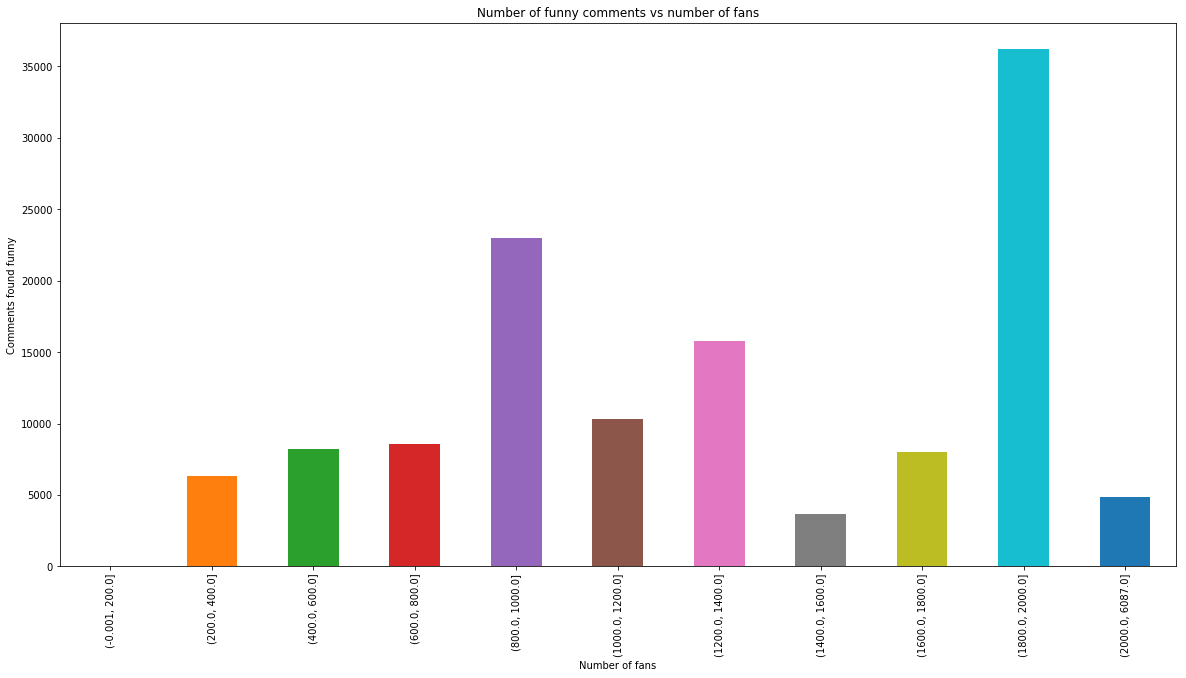

In [57]:
dt_funny = user_data.groupby('fans_class')['funny'].mean()
dt_funny.plot.bar()
plt.gcf().set_size_inches(20, 10, forward=True)
plt.xlabel('Number of fans')
plt.ylabel('Comments found funny')
plt.title('Number of funny comments vs number of fans')
plt.show()

As seen above, there is no real correlation between the number of fans a user has and their ability to make sick jokes and create dank memes. Although it seems that users who have between 1800-2000 fans are incredibly funny. Interesting.

Okay, now lets see if their is a correlation between useful reviews and number of fans.

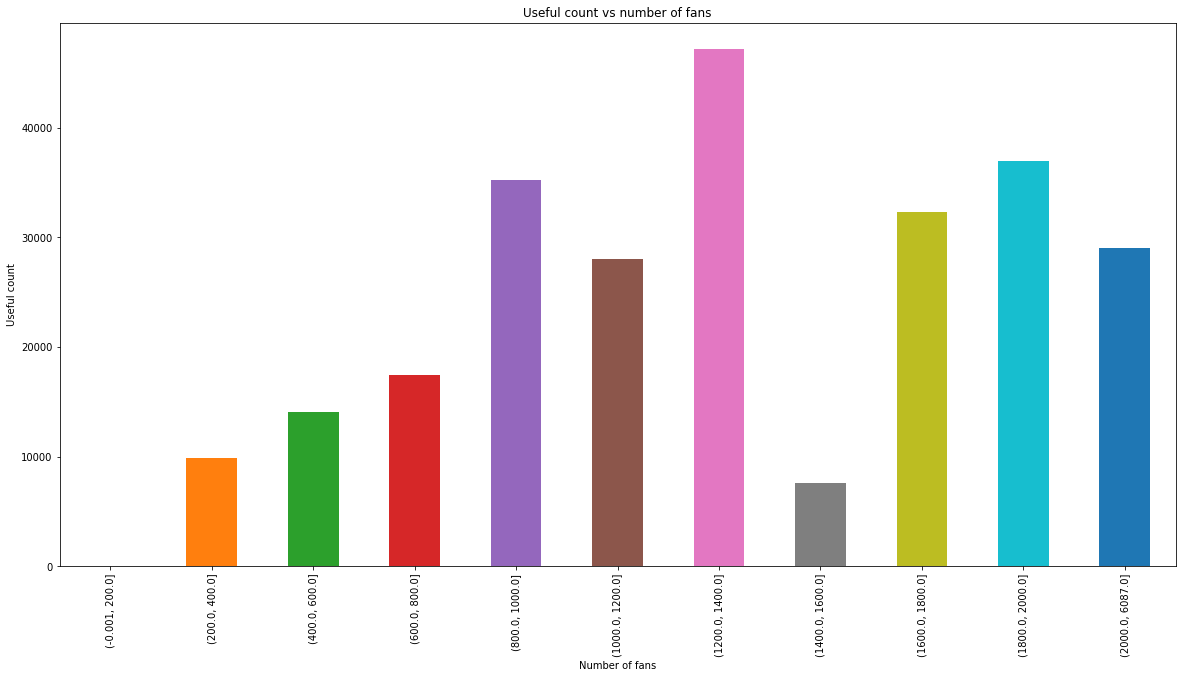

In [56]:
dt_useful = user_data.groupby('fans_class')['useful'].mean()
dt_useful.plot.bar()
plt.gcf().set_size_inches(20, 10, forward=True)
plt.xlabel('Number of fans')
plt.ylabel('Useful count')
plt.title('Useful count vs number of fans')
plt.show()

Although we get slightly better results compared to the correlation between funny and the number of fans, the results still do not indicate correlation. It seems there is some correlation until we reach users with fans over 1400, that's an interesting point. Well, lets keep going!

I wonder if the number of reviews a certain user has indicates the number of fans he or she has....

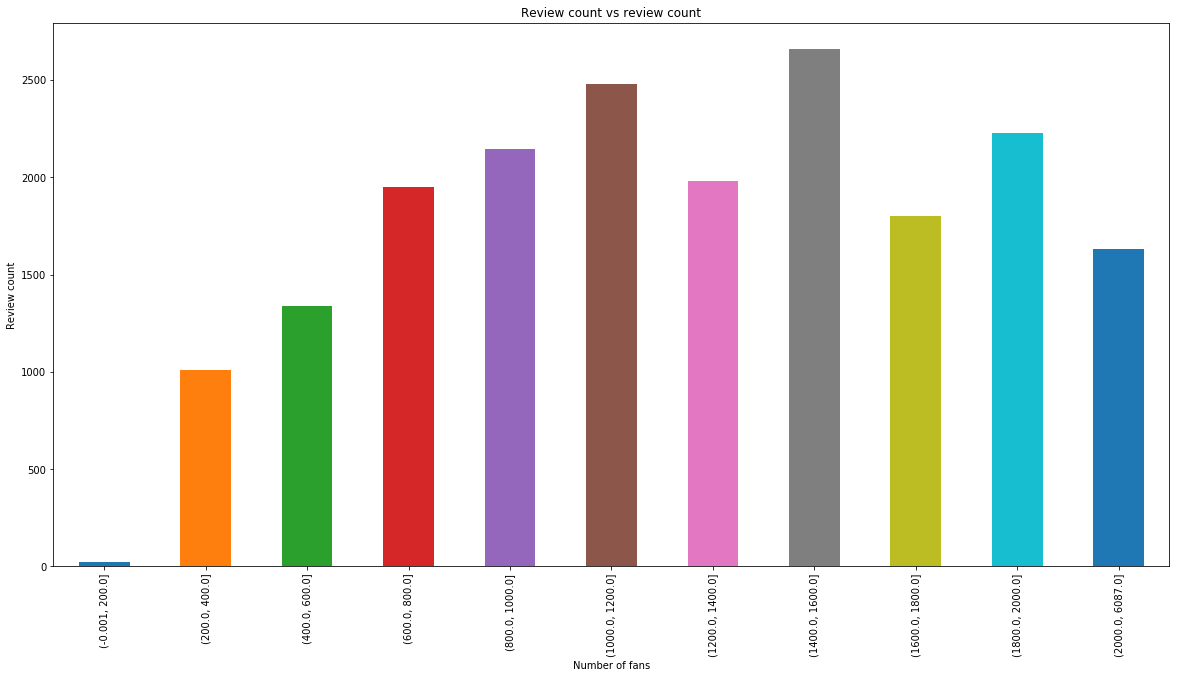

In [59]:
dt_count = user_data.groupby('fans_class')['review_count'].mean()
dt_count.plot.bar()
plt.gcf().set_size_inches(20, 10, forward=True)
plt.xlabel('Number of fans')
plt.ylabel('Review count')
plt.title('Review count vs review count')
plt.show()

There is no explicit correlation, so this is still not good enough for us, we're real sticklers for correlations in our data!

Lets check if the number of friends a user has affects the number of fans, I'm guessing that there will be a strong correlation between the two, cause after all, who doesn't want to follow Mr. Popular?

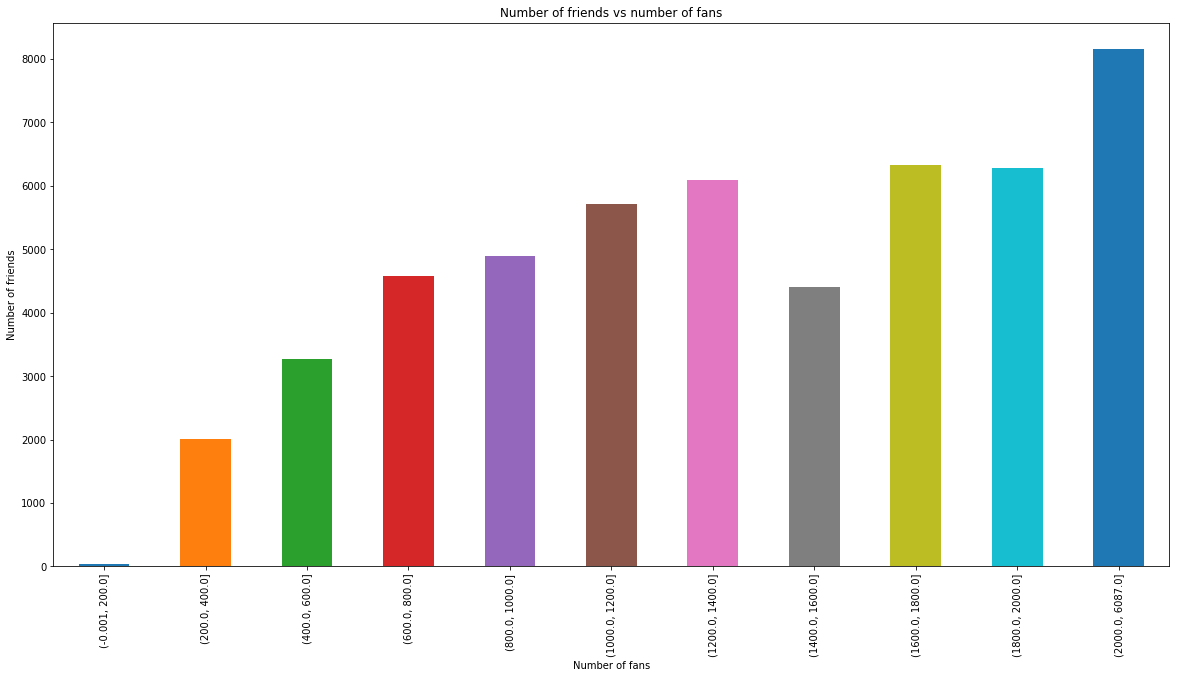

In [58]:
dt_friends = user_data.groupby('fans_class').apply(lambda x : np.sum(len(y) for y in x['friends'])/float(len(x)))
dt_friends.plot.bar()
plt.gcf().set_size_inches(20, 10, forward=True)
plt.xlabel('Number of fans')
plt.ylabel('Number of friends')
plt.title('Number of friends vs number of fans')
plt.show()

As we guessed it.... this bar plot indicates a very strong correlation between the number of friends a user has to the number of fans they have... surprise, surprise.

## Analysis, Hypothesis Testing, and ML

Now that we explored some of the hidden correlations in our data we can start developing our analysis and testing our hypothesis with a little thing called machine learning. Applying machine learning to our dataset will allow us to predict certain dimensions of our data set. We will apply a supervised machine learning algorithm, which means that our algorithm will use data that is labeled and classified in order to make predictions about the data.

<img src="five.png">

In our previous step we were able to find different correlations that explained why a user would have a certain amount of fans. The two strongest correlations we found were the number of reviews a user has and the number of friends a user has. The friends to fans correlation is obvious, so lets look at the reviews themselves and see what in a review makes a certain review "cool", "funny", or "useful", thus giving a user more fans. Here we can apply a machine learning algorithm to analyze the actual reviews themselves and make certain predictions, how in the world do you do that, you ask? Well lets figure it out together....

In order to assess what makes a certain review "cool", "funny" or "useful", we would need to use NLP (natural langauge processing), which we will. However we will need to simplify our problem, yet it will still be very difficult. We will explore ways to predict a user's rating for a business based solely on analyzing the text of his or her review. 

### Feature Finding

We start off by looking for features in the text that could help us determine the user's rating.

So first lets investigate the text size of user's reviews and see if we can find a pattern or correlation of any kind to the rating, and hopefully this will be one of our features.

In [29]:
review_data['text length'] = review_data['text'].apply(len)

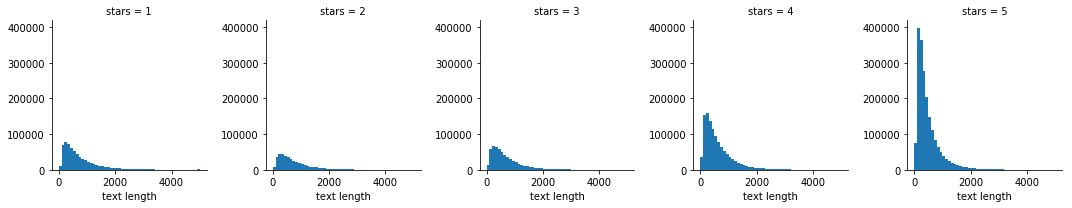

In [30]:
g = sns.FacetGrid(data=review_data, col='stars')
g.map(plt.hist, 'text length', bins=50)

As shown above, the distribution is similar across the ratings, so there is no concrete evidence that length matters, although we see that there is a higher distributional mass for the 5th rating, however this is the result of the greater number of 5 star ratings, lets break it down.

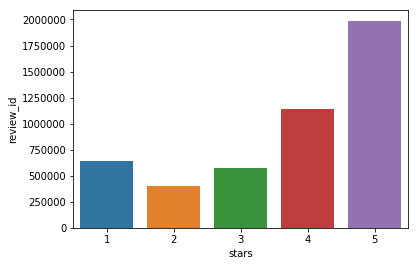

In [31]:
star_counter = review_data.groupby('stars').count()
sns.barplot(x=star_counter.index, y='review_id', data=star_counter)

Looking at our breakdown, 5 star reviews are the largest portion of the ratings by far, coinciding with our previous findings.

Now we will look at the number of words in each review and see if theres is a correlation to the ratings of reviews.

In [32]:
from nltk.tokenize import RegexpTokenizer
#tokens by words
tokenizer = RegexpTokenizer(r'\w+')
#a function, that given text, returns the amount of words.
func = lambda x: len(tokenizer.tokenize(x))
#applying the word counter to our text and saving it as a column
review_data['word length'] = review_data['text'].apply(func)


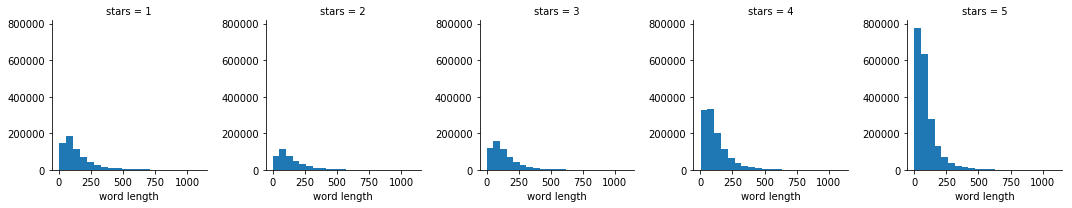

In [33]:
g = sns.FacetGrid(data=review_data, col='stars')
g.map(plt.hist, 'word length', bins=20)

We notice a striking resemblance to the text length plots that we previously ran. This indicates that there is nothing special we can do with this data to test our hypothesis, So the size of the text or the amount of words dont indicate much about the rating, but maybe a user who uses more eloquent and developed vocabulary rates higher consistently. Which probably means longer words, so lets check the average size of words per review...

In [63]:
warnings.filterwarnings("ignore")
#given a text this returns the average word length
func = lambda x: np.mean(list(map(lambda y: len(y), tokenizer.tokenize(x))))
review_data['average word length'] = review_data['text'].apply(func)

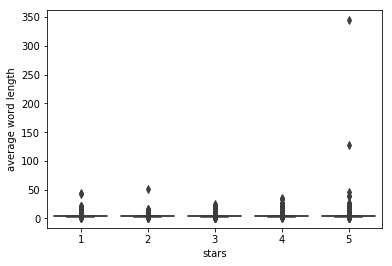

In [35]:
star_avg_words = review_data.groupby('stars')['average word length'].mean()
sns.boxplot(x='stars', y='average word length', data=review_data)

Looking at the boxplot above we see something quite odd, is it possible that a review could have an average word length of more 350 letters? Now I'm curios, lets take a look at what this magical word may be.

In [36]:
review_data['average word length'].idxmax()
review_data.iloc()[review_data['average word length'].idxmax()]

business_id                                       7mGZrCzGGjS95SdRtEaGcQ
cool                                                                  17
date                                                 2009-05-04 00:00:00
funny                                                                 25
review_id                                         gzHFIfWgiqnMIQG0NDHWQA
stars                                                                  5
text                   mmmmmmmmmmmmmmmmmmmmmmmmmmwowmmmmmmmmmmmmmmmmm...
useful                                                                17
user_id                                           QuZbJquRtbY9O9JrB9NpxQ
text length                                                         1727
word length                                                            5
average word length                                                344.6
Name: 43464, dtype: object

Looks like someone fell asleep on their keyboard... or maybe its a review for a keyboard with no space bar? Anyways this is an outlier to our data and should probably be removed to so that we could continue correctly analyzing our data.

In [37]:
review_data[review_data['average word length']< 50].groupby('stars')['average word length'].describe()

,count,mean,std,min,25%,50%,75%,max
stars,,,,,,,,
1,639848.0,4.099264,0.350434,1.0,3.887755,4.062500,4.262141,44.000000
2,402393.0,4.112626,0.330334,1.0,3.912281,4.079208,4.267442,17.333333
3,570819.0,4.125182,0.364668,1.0,3.914634,4.088235,4.283019,26.000000
4,1135830.0,4.198708,0.400406,1.0,3.962963,4.149171,4.368421,35.500000
5,1987999.0,4.263922,0.430367,1.0,4.000000,4.207547,4.461538,46.500000


There is no correlation between average word length and ratings. If there was we'd expect to see a larger difference between means. (On a side note, I actually tried adding these as features and classifying, and the results were much worse)

So because of the large amount of 5 ratings, we need to minimize our dataset so that each of the stars will have an equal number of reviews per rating inorder for our classifier to not have a bias towards 5 star ratings, which as we've seen, are the greatest amount of reviews.

In [38]:
#Here we create a function to balance our classes so that they are the same length
def balance_classes(df, ys):
    freqs = Counter(ys)
    xs = df.text
    # the least common class is the maximum number we want for all classes
    max_allowable = freqs.most_common()[-1][1]
    num_added = {clss: 0 for clss in freqs.keys()}
    new_ys = []
    new_xs = []
    for i, y in enumerate(ys):
        if num_added[y] < max_allowable:
            new_ys.append(y)
            new_xs.append(xs[i])
            num_added[y] += 1
    return new_xs, new_ys

In [39]:
balanced_x, balanced_y = balance_classes(review_data, review_data.stars)
print(Counter(balanced_y))

Counter({1: 402396, 2: 402396, 3: 402396, 4: 402396, 5: 402396})


Voila, now as you can see, each rating has an equal amount of reviews. Now lets extract more features, we split the data between %20 testing data and %80 training data, as these names imply, the training set is used to train our classifier with the data and the test data is to see how well our classifier preforms. We cannot train on all the data because our goal with using machine learning is to see how well our classifier preforms on unobserved data.


### Feature Extraction

Feature Extraction is when you extract features from a dataset in order to feed the machine learning algorithm with relevant values from the proper domain (Vectors as opposed to words).

In [40]:
#split the data to train+test sets
X_train, X_test, y_train, y_test = train_test_split(balanced_x, balanced_y, test_size=0.2, random_state=42)

#Use a stemmer for all the words, and create a bag of words representation from the stemmed words.
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer('english',ignore_stopwords=False)

list(map (stemmer.stem, ['words', 'liking', 'concentration', 'liablity']))

[u'word', u'like', u'concentr', u'liabliti']

We used the NLTK library in order to transform words into their stems or roots. An example of this would be converting the word "liking" to "like", this process is called stemming, and this minimizes our bag or words representation (less words to represent so our feature vector is smaller :) yayy!).

Now we'll extend the count vectorizer of SKLearns library, which counts the appearences of words in reviews, to stems the word and apply a count.

In [41]:
# A decorator for the count vectorizer class. Adds functionality to stem the words before creating a vector 
class StemmedCountVectorizer(CountVectorizer):
    def build_analyzer(self):
        analyzer = super(StemmedCountVectorizer, self).build_analyzer()
        return lambda doc: ([stemmer.stem(w) for w in analyzer(doc)])

After count vectorizer, we will construct a simple pipeline which takes the review, transforms it using our stemmed count vectorizer, then preforms a TF-IDF transformation on the vector, then finally classifies with SVM, a machine learning algorithm.

### Machine Learning

Here we fit our model to the data using a Linear SVM machine learning algorithm.

In [42]:
# creates our decorated vectorizer
stemmed_count_vect = StemmedCountVectorizer()
# creates a pipeline - taking text, vectorizing it, using tf-idf, and and finaly Linear SVM classifier
text_mnb_stemmed = Pipeline([('vect', stemmed_count_vect), ('tfidf', TfidfTransformer()), 
                             ('clf-svm', LinearSVC())])
#fitting our classifier to the data
text_mnb_stemmed.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('vect', StemmedCountVectorizer(analyzer=u'word', binary=False, decode_error=u'strict',
            dtype=<type 'numpy.int64'>, encoding=u'utf-8',
            input=u'content', lowercase=True, max_df=1.0,
            max_features=None, min_df=1, ngram_range=(1, 1),
            preprocessor=No...ax_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0))])

### Evaluation
Here we evaluate by predicting on the test set, and comparing to the actual labels.

In [ ]:
predicted_mnb_stemmed = text_mnb_stemmed.predict(X_test)
np.mean(predicted_mnb_stemmed == y_test)

0.60291851807672048

This is already a great result! Normally 60% accuracy is low but here we have 5 classes to predict, which means that randomly choosing a class would give us 20% accuracy, but lets try choosing different features, and see if we can do better!

### Feature Extraction #2

Maybe stemming wasn't a good choice for feature extraction... Now we'll use the same concept without stemming, but using two consecutive words in our bag of words representation as well, also referred to as bi-grams. This will increase our feature vector size, and helps relating words and giving more context to words in the review. This is done by setting the argument of our vectorizer, ngram_range, to (1,2). 

In [49]:
# This vectorizer breaks text into single words and bi-grams
# and then calculates the TF-IDF representation
vectorizer = TfidfVectorizer(ngram_range=(1,2))
vectors = vectorizer.fit_transform(balanced_x)
vectors.shape

(2011980, 14561257)

Wow thats a huge vector.... Each feature is as big as my hopes and dreams before I took CMSC 351. Lets split the data set again, and run our classifier on the training data.

### Machine Learning #2

In [50]:
X_train, X_test, y_train, y_test = train_test_split(vectors, balanced_y, test_size=0.2, random_state=42)

# initialise the SVM classifier
classifier = LinearSVC()

# train the classifier
classifier.fit(X_train, y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

### Evaluation #2
Lets sample our results and see how we do...
We take 10 samples, make a prediction using our model and compare the results to the actual labels.

In [51]:
preds = classifier.predict(X_test)
print(list(preds[:10]))
print(y_test[:10])

[5, 5, 4, 4, 3, 2, 1, 2, 2, 2]
[5, 5, 4, 4, 3, 2, 1, 2, 2, 1]


The first line is our predictions, and the second line is the actual labels. We got 9/10 matching! Not too shabby.... 
Now lets evaluate our classifier, we check how our classifier preforms on the whole test set and take the percentage of correct predictions. 

In [52]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, preds))

0.627970953986


Wow, 63 percent, even better than our earlier classifier!!

Accuracy is a crude metric, there are of course finer grained evaluation methods. It’s likely that some classes are ‘easier’ to predict than others, so we want to look at how well the classifier can predict each class (for example, only 5-star reviews) individually. Looking at results on a per-class level means that there are two different ways that the classifier could be wrong. For a given review and a given class, the classifier might have a false positive or a false negative classification. If we take 5-star reviews as an example, a false positive occurs when the classifier predicted that a review was a 5-star review when in fact it wasn’t. A false negative occurs when the classifier predicted a review wasn’t a 5-star review, when in fact it was.


A classifier that could predict 5-star reviews with high precision would almost never predict that other reviews were 5-star reviews, but it might ‘miss’ many real 5-star reviews and classify them into other classes. A classifier with high recall for 5-star reviews would hardly ever predict that a 5-star review was something else, but it might predict that many other reviews are 5-star reviews. Lets look at how our model does given these metrics.

In [53]:
from sklearn.metrics import classification_report
print(classification_report(y_test, preds))

             precision    recall  f1-score   support

          1       0.73      0.79      0.76     80315
          2       0.56      0.53      0.55     80558
          3       0.55      0.52      0.53     80617
          4       0.56      0.54      0.55     80485
          5       0.72      0.76      0.74     80421

avg / total       0.62      0.63      0.63    402396



<img src="recal.png" width="300" height="50">

<center>credit: Wikipedia "https://en.wikipedia.org/wiki/Precision_and_recall#Precision" </center>


In the binary case(in our case this is evaluated for each label as a separate binary case):<br>
<b>_tp_</b> is <b>True Positive</b> - instances that are True and the classifier predicted True<br>
<b>_fp_</b> is <b>False Positive</b> - all the instances that are False and the classifier predicted True<br>
<b>_fn_</b> is <b>False Negative</b> - all the instances that are False and the classifier predicted False.<br>

The <b>_F-1_</b> score measures the combination of both recall and precision in a single metric, and we would like our classifier to strike a balance between precision and recall.

We can see that 1 and 5 ratings are the easiest to predict and we get higher <b>_F-1_</b> scores for them, the neutral ratings are harder to predict and as such, have lower <b>_F-1_</b> scores 

## Insight & Policy Decision

Well we've had a great time collecting, processing, exploring, visualizing, hypothesizing, and testing our data, but all good things come to an end, and now we too come to our conclusion. In this final step we gather all our results from the previous steps and use those results to make a certain decision or gain some valuable insight.

<img src="six.png">

### Our Conclusion

To be honest, not much, but this is a part of data science! We started off with a real neat dataset, we explored the data to try to find interesting correlations between attributes. We had a hypothesis (Does a user with alot of fans rate higher?), we tested the hypothesis, and found that our hypothesis was inconclusive and rejected our hypothesis, it seems to be that the number of Yelp fans is really correlated to the number of friends a Yelp user has. We found this to be underwhelming. Next, we decided to delve into the reviews themselves and use more advanced data science tools to analyze the text. 

First we defined our classification problem, <b>Can we predict the rating of a user given only the users review?</b> We started off looking for features that could help us classify the reviews. We saw that the length, the number of words, and the average length of words, all don't support our text classification needs. Then, we tried two different feature extraction methods, the first by stemming the words then using a TF-IDF bag of words represntation as our feature vector, the second using a TF-IDF bag of words representation with both unigrams and bigrams. For both represntations we used a linear SVM machine learning algorithm, with which we suceeded in predicting ratings based only on the reviews with accuracy of around 60% on our first attempt. On our second attempt we saw that predicting 5 star ratings and 1 star ratings were much easier than 2,3, and 4 ratings and we succeeded on this attempt with %62 accuracy!! Look out world, there are some new data scientists on the block!! 


<img src="borat.png">


<b>But none of this would be possible without Dr. John Dickerson and Dr. Amol Deshpande, thanks again for a great semester!!</b>

## Credits

The Data: Yelp https://www.yelp.com/dataset<br>
The cool Data Lifecycle pictures: Dr. John Dickerson and Dr. Amol Deshpande<br>
Memes: Google
